In [1]:
# pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu121

In [2]:
import cnn_functions
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torchvision import  transforms
from torchvision.models import resnet18, ResNet18_Weights
from torchvision.io import read_image
from torch.utils.data import Dataset, Subset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Binary output

In [3]:
labels_map = {
    0: "REAL",
    1: "FAKE"
}

# Define the dataset object
class BinaryDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.transform = transform
        self.img_dir = img_dir
        self.img_labels = []
        self.img_paths = []
        for label, generated in enumerate(["REAL", "FAKE"]):
            image_files = os.listdir(img_dir + "/" + generated)
            for image_name in image_files:
                self.img_labels.append(label)
                self.img_paths.append(os.path.join(generated, image_name))

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_paths[idx])
        image = read_image(img_path)
        label = self.img_labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

In [4]:
# Compose the transform to perform on the data
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor()
])

# 100k samples for training
train_ds = BinaryDataset(img_dir='./archive/train', transform=transform)

# 10k samples for validation and 10k samples for testing
test_val_ds= BinaryDataset(img_dir='./archive/test', transform=transform)
# Perform a stratified split
idx_train, idx_val = train_test_split(
    range(len(test_val_ds)),
    test_size=0.5,  # 50-50 split
    stratify=test_val_ds.img_labels,
    random_state=0
)
# Define the subsets
test_ds = Subset(test_val_ds, idx_train)
validation_ds = Subset(test_val_ds, idx_val)

# Feature extraction

In [5]:
def binary_feature_extraction(lr):
    # Load the pretrained ResNet18 model
    model = resnet18(weights=ResNet18_Weights.DEFAULT)

    # Freeze all layers in the network
    for param in model.parameters():
        param.requires_grad = False

    # Replace the last fully connected layer with binary output
    model.fc = torch.nn.Linear(512, 2)

    # Load the model into the GPU
    model = model.to(device)
    # Ensure the optimizer only updates the parameters of the last layer
    optimizer = torch.optim.Adam(model.fc.parameters(), lr=lr)
    
    return model, optimizer



 - binary_feature_extraction_lr0001_batch8_epochs30

Epoch 1; Train err = 25.44; Val err = 25.08; Loss: 0.5651
Epoch 2; Train err = 25.65; Val err = 25.34; Loss: 0.5348
Epoch 3; Train err = 25.09; Val err = 25.53; Loss: 0.5351
Epoch 4; Train err = 25.69; Val err = 25.82; Loss: 0.5337
Epoch 5; Train err = 25.67; Val err = 25.58; Loss: 0.5329
Epoch 10; Train err = 24.88; Val err = 24.92; Loss: 0.5346
Epoch 15; Train err = 25.12; Val err = 25.16; Loss: 0.5321
Epoch 20; Train err = 26.19; Val err = 26.11; Loss: 0.5321
Epoch 25; Train err = 24.63; Val err = 24.89; Loss: 0.5353
Epoch 30; Train err = 25.33; Val err = 25.45; Loss: 0.5337


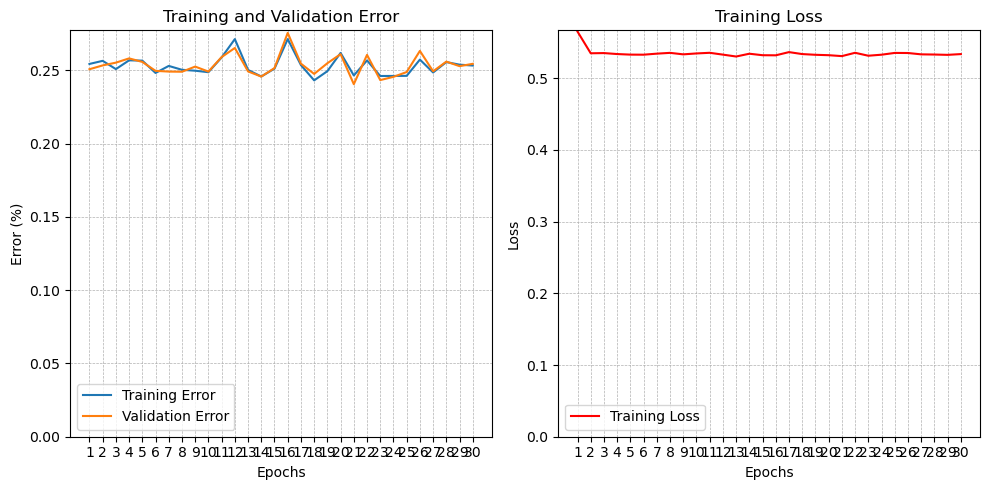



 - binary_feature_extraction_lr0001_batch16_epochs30

Epoch 1; Train err = 24.86; Val err = 24.59; Loss: 0.5538
Epoch 2; Train err = 23.97; Val err = 24.03; Loss: 0.5168
Epoch 3; Train err = 23.67; Val err = 24.02; Loss: 0.5122
Epoch 4; Train err = 23.38; Val err = 23.09; Loss: 0.5131
Epoch 5; Train err = 23.48; Val err = 23.69; Loss: 0.5101
Epoch 10; Train err = 23.42; Val err = 22.93; Loss: 0.5090
Epoch 15; Train err = 23.92; Val err = 23.97; Loss: 0.5088
Epoch 20; Train err = 23.77; Val err = 24.32; Loss: 0.5091
Epoch 25; Train err = 23.47; Val err = 23.40; Loss: 0.5092
Epoch 30; Train err = 22.70; Val err = 22.88; Loss: 0.5089


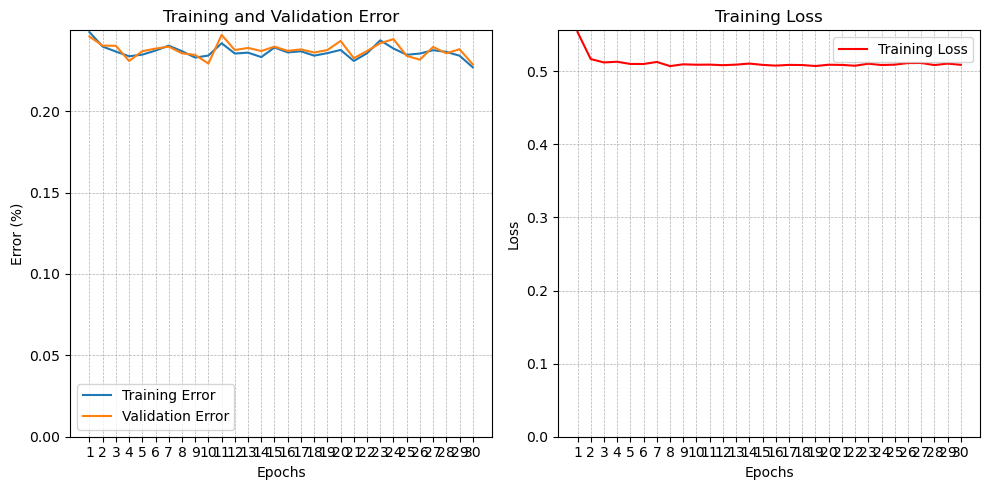



 - binary_feature_extraction_lr0001_batch32_epochs30

Epoch 1; Train err = 24.24; Val err = 24.72; Loss: 0.5586
Epoch 2; Train err = 23.78; Val err = 24.11; Loss: 0.5072
Epoch 3; Train err = 23.04; Val err = 23.44; Loss: 0.5014
Epoch 4; Train err = 23.00; Val err = 23.28; Loss: 0.5005
Epoch 5; Train err = 22.85; Val err = 23.21; Loss: 0.4994
Epoch 10; Train err = 22.87; Val err = 23.11; Loss: 0.4972
Epoch 15; Train err = 23.08; Val err = 23.17; Loss: 0.4974
Epoch 20; Train err = 23.25; Val err = 22.93; Loss: 0.4946
Epoch 25; Train err = 23.01; Val err = 23.12; Loss: 0.4989
Epoch 30; Train err = 22.68; Val err = 22.52; Loss: 0.4966


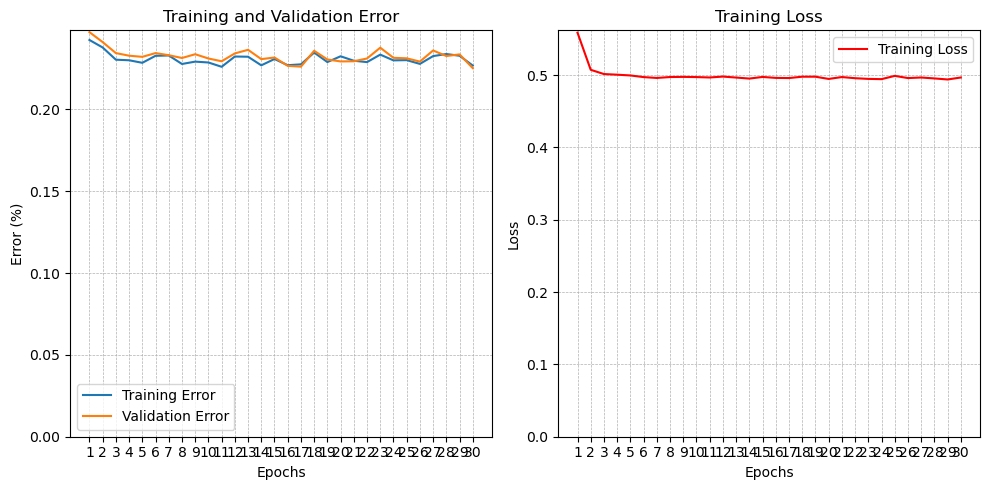



 - binary_feature_extraction_lr0001_batch64_epochs30

Epoch 1; Train err = 24.93; Val err = 25.51; Loss: 0.5847
Epoch 2; Train err = 23.54; Val err = 23.87; Loss: 0.5104
Epoch 3; Train err = 23.25; Val err = 23.54; Loss: 0.5024
Epoch 4; Train err = 23.26; Val err = 23.38; Loss: 0.4970
Epoch 5; Train err = 22.91; Val err = 22.85; Loss: 0.4931
Epoch 10; Train err = 22.74; Val err = 23.12; Loss: 0.4909
Epoch 15; Train err = 22.50; Val err = 22.84; Loss: 0.4877
Epoch 20; Train err = 22.44; Val err = 22.67; Loss: 0.4889
Epoch 25; Train err = 22.71; Val err = 23.04; Loss: 0.4879
Epoch 30; Train err = 22.59; Val err = 22.98; Loss: 0.4878


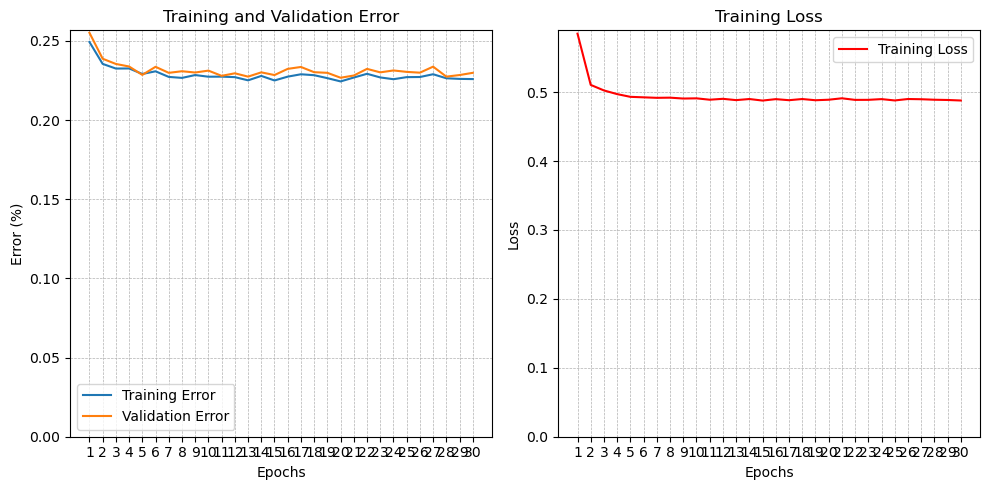



 - binary_feature_extraction_lr-05_batch8_epochs30

Epoch 1; Train err = 31.86; Val err = 31.64; Loss: 0.6621
Epoch 2; Train err = 28.82; Val err = 29.02; Loss: 0.5799
Epoch 3; Train err = 27.61; Val err = 27.40; Loss: 0.5594
Epoch 4; Train err = 27.08; Val err = 27.00; Loss: 0.5516
Epoch 5; Train err = 26.93; Val err = 27.01; Loss: 0.5437
Epoch 10; Train err = 25.21; Val err = 25.69; Loss: 0.5367
Epoch 15; Train err = 25.21; Val err = 25.36; Loss: 0.5314
Epoch 20; Train err = 24.88; Val err = 24.66; Loss: 0.5295
Epoch 25; Train err = 25.44; Val err = 25.46; Loss: 0.5277
Epoch 30; Train err = 24.70; Val err = 24.51; Loss: 0.5259


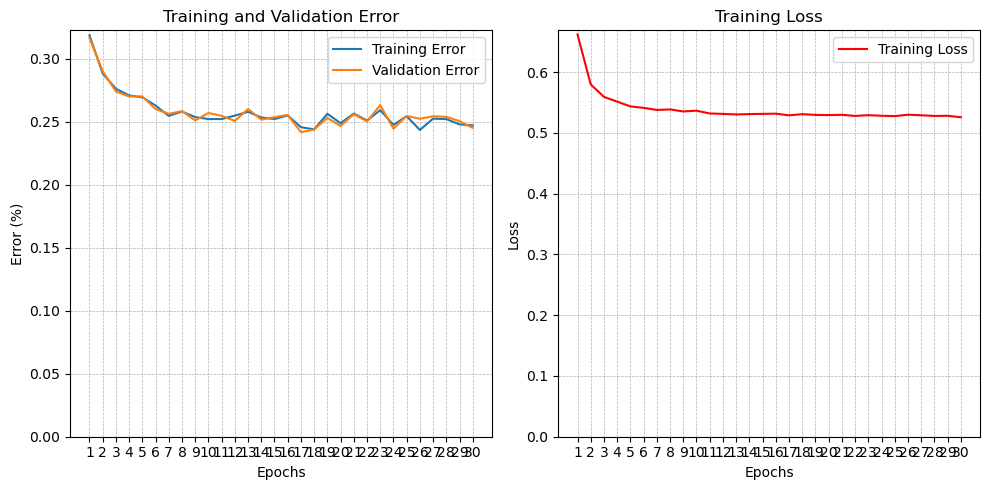



 - binary_feature_extraction_lr-05_batch16_epochs30

Epoch 1; Train err = 31.25; Val err = 31.36; Loss: 0.6814
Epoch 2; Train err = 27.99; Val err = 28.34; Loss: 0.5789
Epoch 3; Train err = 26.87; Val err = 26.51; Loss: 0.5496
Epoch 4; Train err = 25.59; Val err = 26.52; Loss: 0.5380
Epoch 5; Train err = 25.22; Val err = 25.22; Loss: 0.5317
Epoch 10; Train err = 24.22; Val err = 24.52; Loss: 0.5134
Epoch 15; Train err = 23.96; Val err = 24.49; Loss: 0.5112
Epoch 20; Train err = 24.13; Val err = 24.17; Loss: 0.5103
Epoch 25; Train err = 23.49; Val err = 23.70; Loss: 0.5061
Epoch 30; Train err = 23.48; Val err = 23.84; Loss: 0.5054


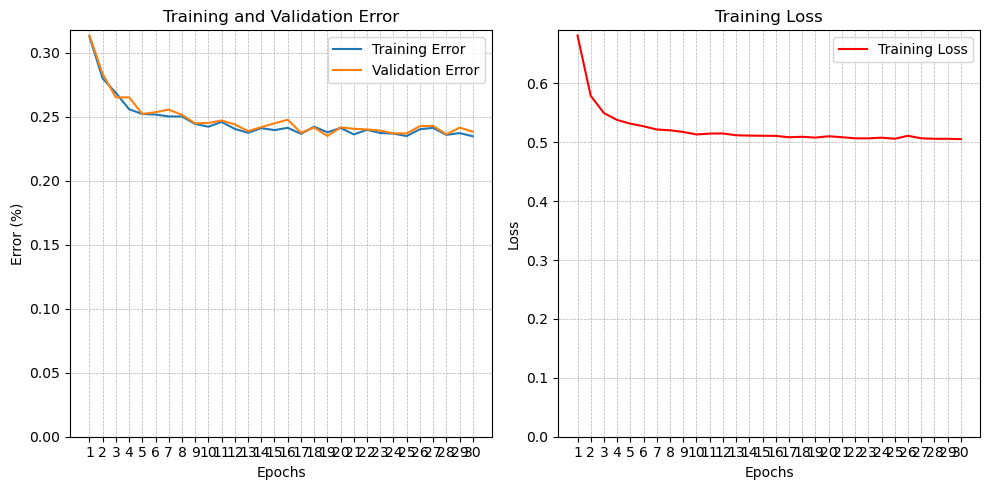



 - binary_feature_extraction_lr-05_batch32_epochs30

Epoch 1; Train err = 34.86; Val err = 35.43; Loss: 0.7071
Epoch 2; Train err = 28.95; Val err = 29.46; Loss: 0.6003
Epoch 3; Train err = 26.97; Val err = 27.25; Loss: 0.5609
Epoch 4; Train err = 26.01; Val err = 26.33; Loss: 0.5426
Epoch 5; Train err = 25.60; Val err = 25.58; Loss: 0.5318
Epoch 10; Train err = 23.84; Val err = 23.90; Loss: 0.5118
Epoch 15; Train err = 23.33; Val err = 23.37; Loss: 0.5050
Epoch 20; Train err = 23.23; Val err = 23.04; Loss: 0.5019
Epoch 25; Train err = 22.97; Val err = 23.36; Loss: 0.4985
Epoch 30; Train err = 23.01; Val err = 23.32; Loss: 0.4973


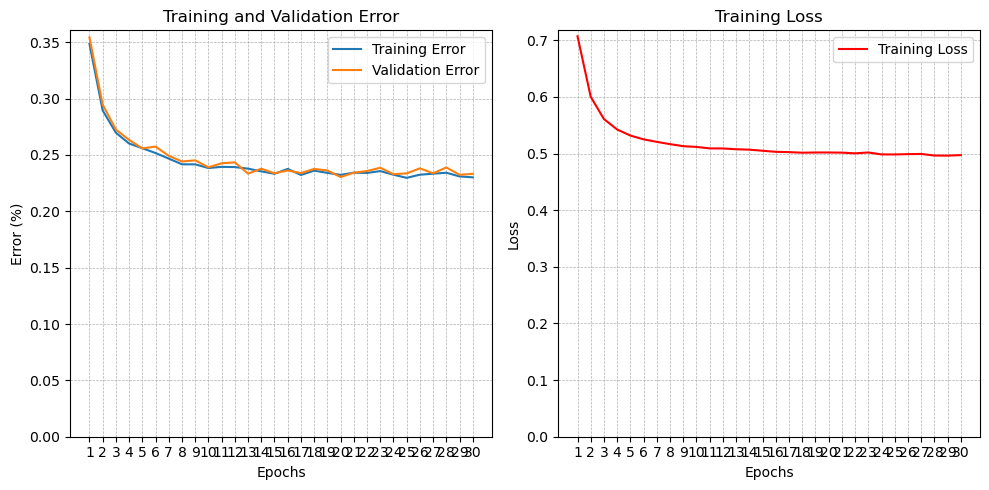



 - binary_feature_extraction_lr-05_batch64_epochs30

Epoch 1; Train err = 35.81; Val err = 35.69; Loss: 0.6981
Epoch 2; Train err = 30.69; Val err = 30.92; Loss: 0.6160
Epoch 3; Train err = 28.35; Val err = 28.21; Loss: 0.5797
Epoch 4; Train err = 27.10; Val err = 27.30; Loss: 0.5584
Epoch 5; Train err = 26.43; Val err = 26.37; Loss: 0.5442
Epoch 10; Train err = 24.44; Val err = 24.27; Loss: 0.5160
Epoch 15; Train err = 24.02; Val err = 23.95; Loss: 0.5067
Epoch 20; Train err = 23.65; Val err = 23.81; Loss: 0.5006
Epoch 25; Train err = 23.17; Val err = 23.10; Loss: 0.4977
Epoch 30; Train err = 23.25; Val err = 23.40; Loss: 0.4957


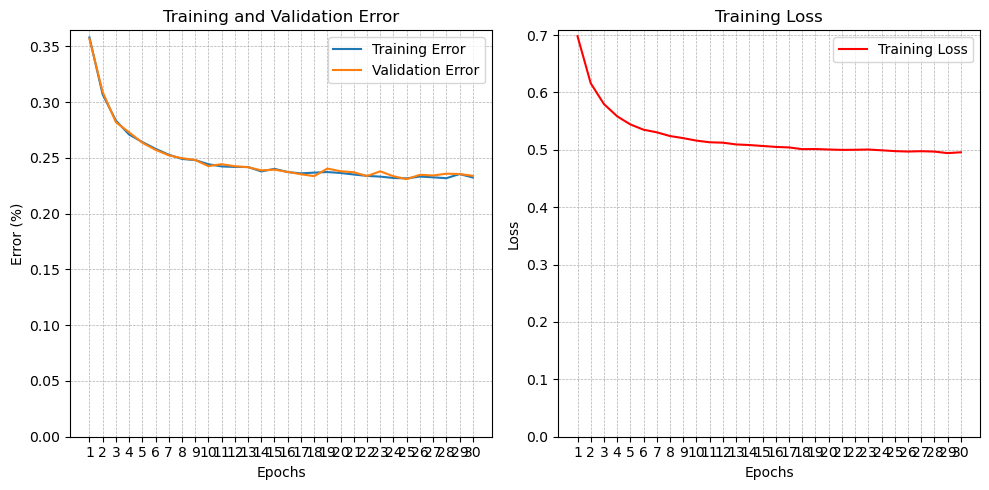



 - binary_feature_extraction_lr-06_batch8_epochs30

Epoch 1; Train err = 46.76; Val err = 47.38; Loss: 0.7804
Epoch 2; Train err = 43.41; Val err = 44.16; Loss: 0.7225
Epoch 3; Train err = 40.91; Val err = 41.88; Loss: 0.6880
Epoch 4; Train err = 38.64; Val err = 39.01; Loss: 0.6657
Epoch 5; Train err = 36.95; Val err = 37.71; Loss: 0.6462
Epoch 10; Train err = 31.56; Val err = 32.11; Loss: 0.5972
Epoch 15; Train err = 29.02; Val err = 29.33; Loss: 0.5746
Epoch 20; Train err = 28.66; Val err = 29.18; Loss: 0.5658
Epoch 25; Train err = 27.81; Val err = 28.21; Loss: 0.5577
Epoch 30; Train err = 27.49; Val err = 27.50; Loss: 0.5514


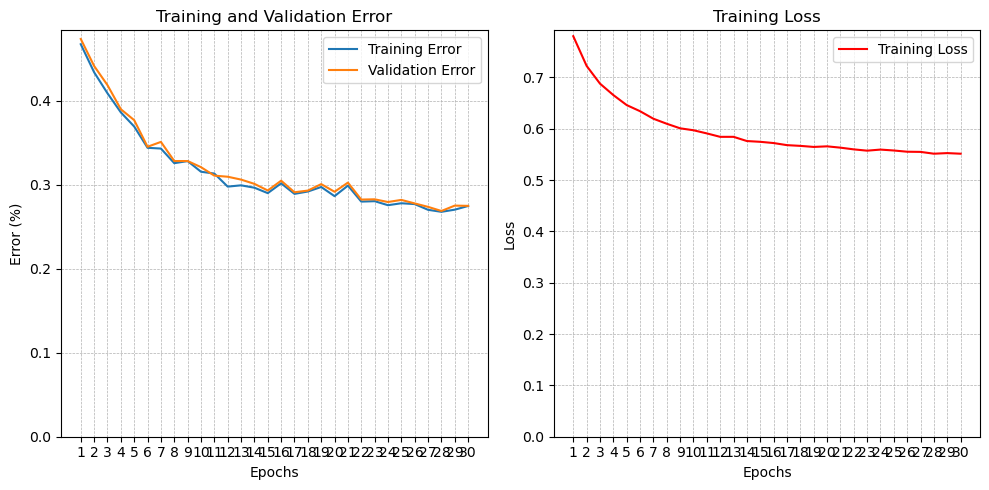



 - binary_feature_extraction_lr-06_batch16_epochs30

Epoch 1; Train err = 48.32; Val err = 48.51; Loss: 0.7786
Epoch 2; Train err = 45.68; Val err = 45.80; Loss: 0.7386
Epoch 3; Train err = 41.97; Val err = 42.35; Loss: 0.7044
Epoch 4; Train err = 39.91; Val err = 40.10; Loss: 0.6816
Epoch 5; Train err = 37.43; Val err = 37.64; Loss: 0.6607
Epoch 10; Train err = 32.36; Val err = 32.71; Loss: 0.6052
Epoch 15; Train err = 30.01; Val err = 30.74; Loss: 0.5785
Epoch 20; Train err = 27.97; Val err = 27.95; Loss: 0.5622
Epoch 25; Train err = 27.72; Val err = 27.79; Loss: 0.5518
Epoch 30; Train err = 27.27; Val err = 27.59; Loss: 0.5466


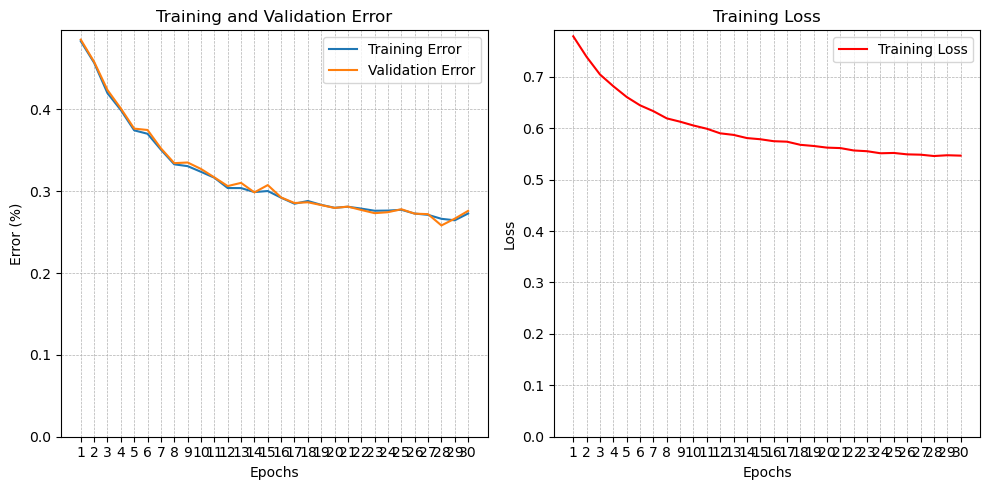



 - binary_feature_extraction_lr-06_batch32_epochs30

Epoch 1; Train err = 48.14; Val err = 48.54; Loss: 0.8222
Epoch 2; Train err = 45.95; Val err = 46.56; Loss: 0.7654
Epoch 3; Train err = 44.38; Val err = 45.37; Loss: 0.7409
Epoch 4; Train err = 42.46; Val err = 42.69; Loss: 0.7189
Epoch 5; Train err = 41.17; Val err = 41.58; Loss: 0.7004
Epoch 10; Train err = 34.85; Val err = 35.42; Loss: 0.6358
Epoch 15; Train err = 31.32; Val err = 31.79; Loss: 0.5991
Epoch 20; Train err = 29.67; Val err = 30.11; Loss: 0.5802
Epoch 25; Train err = 27.89; Val err = 28.22; Loss: 0.5640
Epoch 30; Train err = 27.57; Val err = 28.02; Loss: 0.5543


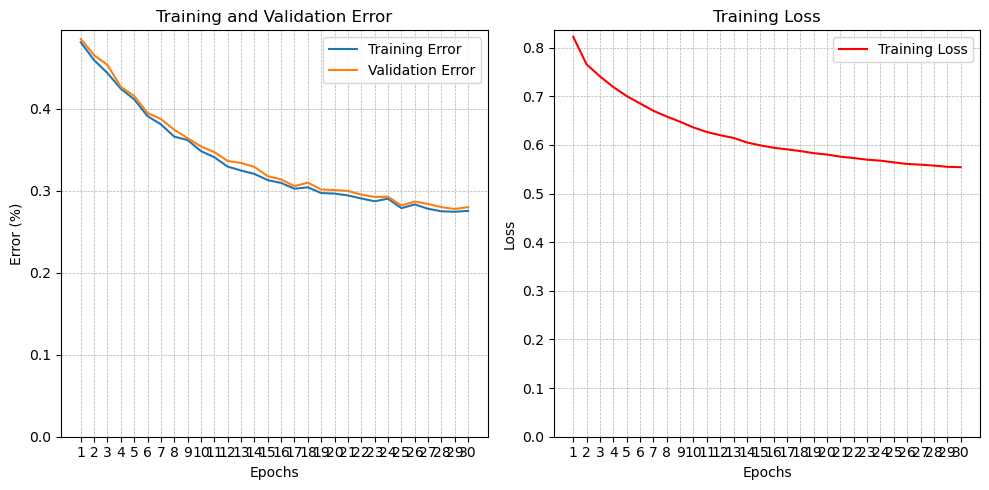



 - binary_feature_extraction_lr-06_batch64_epochs30

Epoch 1; Train err = 49.23; Val err = 48.69; Loss: 0.7832
Epoch 2; Train err = 48.23; Val err = 47.77; Loss: 0.7671
Epoch 3; Train err = 46.98; Val err = 46.50; Loss: 0.7536
Epoch 4; Train err = 45.19; Val err = 44.56; Loss: 0.7387
Epoch 5; Train err = 43.98; Val err = 43.30; Loss: 0.7255
Epoch 10; Train err = 38.69; Val err = 38.48; Loss: 0.6752
Epoch 15; Train err = 35.27; Val err = 35.76; Loss: 0.6381
Epoch 20; Train err = 32.08; Val err = 32.64; Loss: 0.6121
Epoch 25; Train err = 30.41; Val err = 30.71; Loss: 0.5935
Epoch 30; Train err = 29.38; Val err = 29.89; Loss: 0.5791


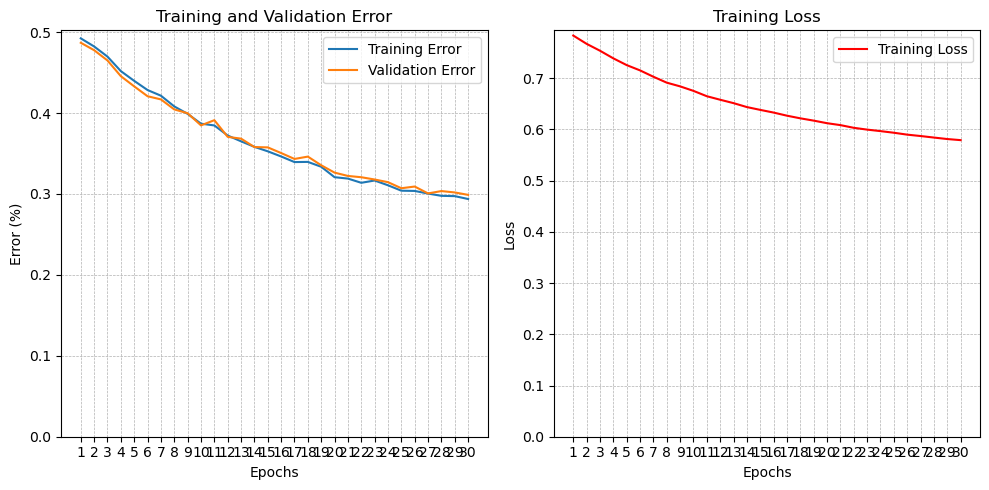

In [6]:
epochs = 30
learning_rates = [0.0001, 0.00001, 0.000001]
batch_sizes = [8, 16, 32, 64]

for lr in learning_rates:
    for batch_size in batch_sizes:
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
        val_dl = DataLoader(validation_ds, batch_size=1000)

        model, opt = binary_feature_extraction(lr)

        print(f"\n\n - binary_feature_extraction_lr{str(lr-int(lr))[2:]}_batch{batch_size}_epochs{epochs}\n")

        train_acc, val_acc, train_loss = cnn_functions.train_network(opt, model, device, epochs, train_dl, val_dl)

        cnn_functions.plot_accuracies(train_acc, val_acc, train_loss)

        torch.save(model.state_dict(), f'./weights/binary_feature_extraction_lr{str(lr-int(lr))[2:]}_batch{batch_size}_epochs{epochs}.pth')

# Feature extraction with one hidden layer

In [6]:
def binary_extraction_hidden(lr):
    # Load the pretrained ResNet18 model
    model = resnet18(weights=ResNet18_Weights.DEFAULT)

    # Freeze all layers in the network
    for param in model.parameters():
        param.requires_grad = False

    # Replace the last fully connected layer
    model.fc = torch.nn.Sequential(
    torch.nn.Linear(512, 64),  # Additional layer
    torch.nn.ReLU(),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(64, 2)  # Output layer
    )

    # Load the model into the GPU
    model = model.to(device)
    # Ensure the optimizer only updates the parameters of the last layer
    optimizer = torch.optim.Adam(model.fc.parameters(), lr=lr)
    
    return model, optimizer



 - binary_extraction_hidden_lr0001_batch32_epochs30

Epoch 1; Train err = 23.20; Val err = 23.43; Loss: 0.5360
Epoch 2; Train err = 21.81; Val err = 22.18; Loss: 0.4974
Epoch 3; Train err = 20.92; Val err = 21.22; Loss: 0.4839
Epoch 4; Train err = 20.30; Val err = 20.83; Loss: 0.4715
Epoch 5; Train err = 19.80; Val err = 20.36; Loss: 0.4692
Epoch 10; Train err = 18.57; Val err = 19.46; Loss: 0.4509
Epoch 15; Train err = 17.68; Val err = 19.28; Loss: 0.4417
Epoch 20; Train err = 17.31; Val err = 18.97; Loss: 0.4358
Epoch 25; Train err = 16.71; Val err = 18.45; Loss: 0.4311
Epoch 30; Train err = 16.61; Val err = 18.30; Loss: 0.4295


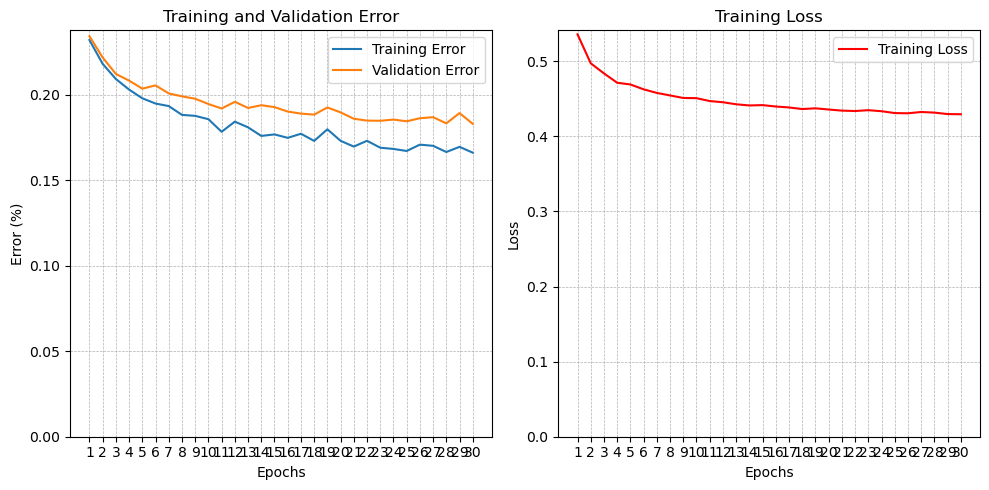



 - binary_extraction_hidden_lr0001_batch128_epochs30

Epoch 1; Train err = 23.29; Val err = 23.75; Loss: 0.5548
Epoch 2; Train err = 22.39; Val err = 22.83; Loss: 0.4971
Epoch 3; Train err = 21.74; Val err = 22.02; Loss: 0.4850
Epoch 4; Train err = 21.08; Val err = 21.56; Loss: 0.4735
Epoch 5; Train err = 20.36; Val err = 21.16; Loss: 0.4658
Epoch 10; Train err = 18.76; Val err = 20.38; Loss: 0.4394
Epoch 15; Train err = 17.42; Val err = 19.21; Loss: 0.4244
Epoch 20; Train err = 16.63; Val err = 18.92; Loss: 0.4139
Epoch 25; Train err = 16.09; Val err = 18.62; Loss: 0.4084
Epoch 30; Train err = 15.75; Val err = 18.54; Loss: 0.4022


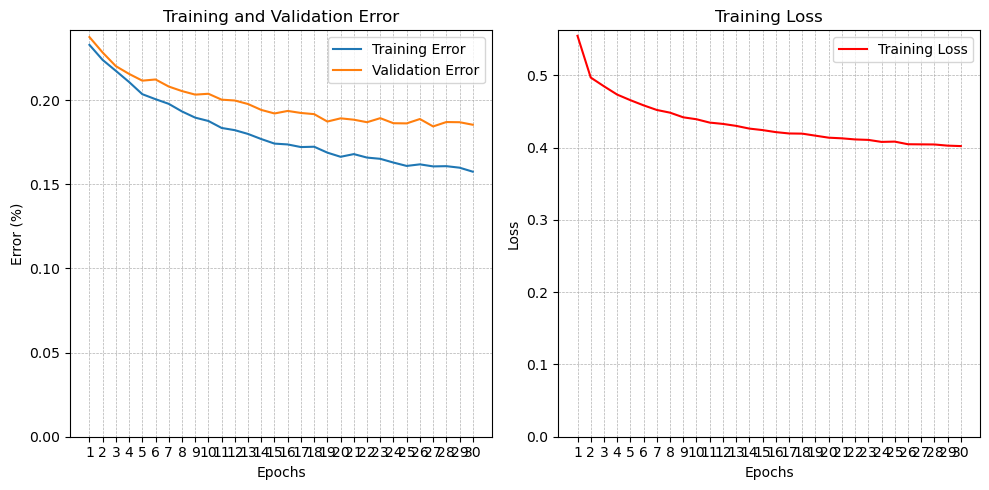



 - binary_extraction_hidden_lr-05_batch32_epochs30

Epoch 1; Train err = 26.87; Val err = 26.98; Loss: 0.6312
Epoch 2; Train err = 25.36; Val err = 25.03; Loss: 0.5580
Epoch 3; Train err = 24.91; Val err = 24.87; Loss: 0.5361
Epoch 4; Train err = 23.91; Val err = 23.72; Loss: 0.5265
Epoch 5; Train err = 23.38; Val err = 23.35; Loss: 0.5185
Epoch 10; Train err = 22.44; Val err = 22.71; Loss: 0.4998
Epoch 15; Train err = 21.97; Val err = 22.12; Loss: 0.4886
Epoch 20; Train err = 21.31; Val err = 21.92; Loss: 0.4815
Epoch 25; Train err = 21.20; Val err = 21.39; Loss: 0.4759
Epoch 30; Train err = 20.27; Val err = 20.88; Loss: 0.4687


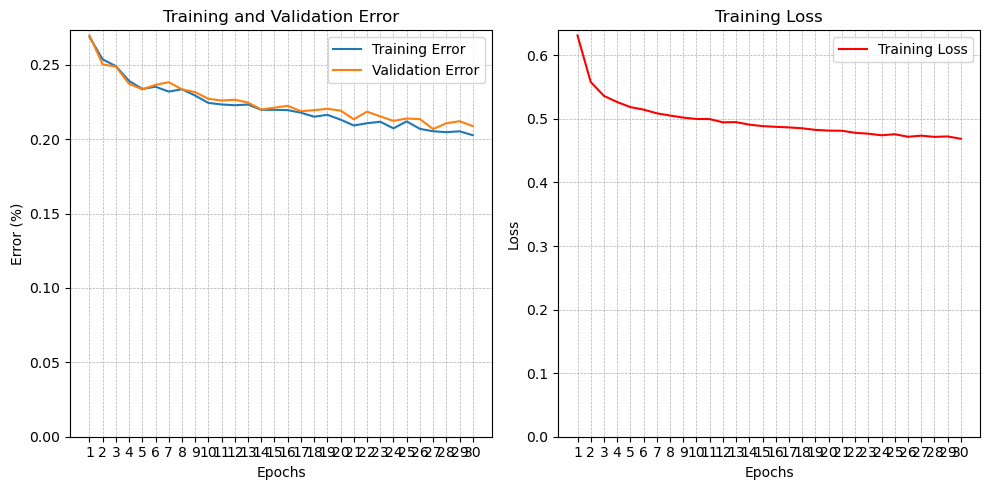



 - binary_extraction_hidden_lr-05_batch128_epochs30

Epoch 1; Train err = 31.27; Val err = 31.53; Loss: 0.6695
Epoch 2; Train err = 27.34; Val err = 27.94; Loss: 0.6060
Epoch 3; Train err = 26.03; Val err = 26.15; Loss: 0.5713
Epoch 4; Train err = 25.39; Val err = 25.71; Loss: 0.5499
Epoch 5; Train err = 24.74; Val err = 24.63; Loss: 0.5365
Epoch 10; Train err = 23.55; Val err = 23.55; Loss: 0.5084
Epoch 15; Train err = 23.09; Val err = 23.17; Loss: 0.4983
Epoch 20; Train err = 22.27; Val err = 22.77; Loss: 0.4905
Epoch 25; Train err = 22.18; Val err = 22.53; Loss: 0.4819
Epoch 30; Train err = 21.64; Val err = 22.04; Loss: 0.4764


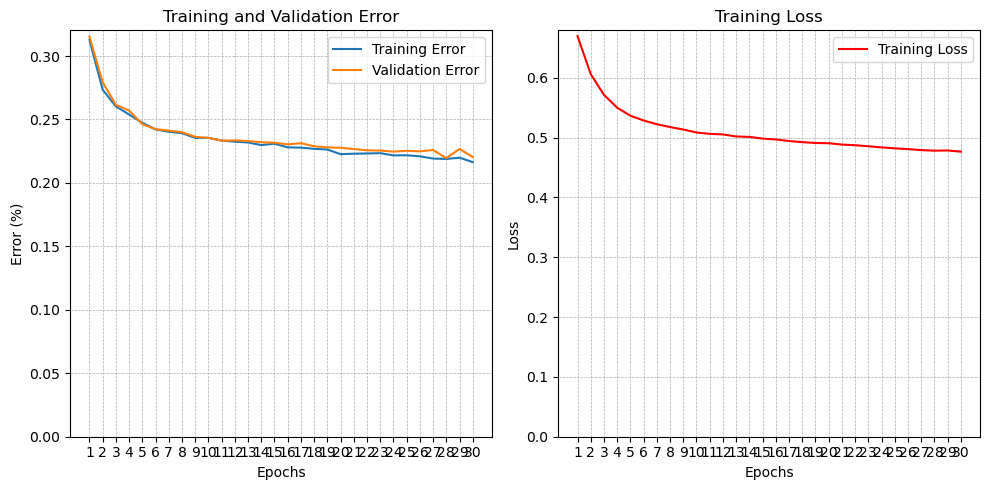

In [6]:
epochs = 30
learning_rates = [0.0001, 0.00001]
batch_sizes = [32, 128]

for lr in learning_rates:
    for batch_size in batch_sizes:
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
        val_dl = DataLoader(validation_ds, batch_size=1000)

        model, opt = binary_extraction_hidden(lr)

        print(f"\n\n - binary_extraction_hidden_lr{str(lr-int(lr))[2:]}_batch{batch_size}_epochs{epochs}\n")

        train_acc, val_acc, train_loss = cnn_functions.train_network(opt, model, device, epochs, train_dl, val_dl)

        cnn_functions.plot_accuracies(train_acc, val_acc, train_loss)

        torch.save(model.state_dict(), f'./weights/binary_extraction_hidden_lr{str(lr-int(lr))[2:]}_batch{batch_size}_epochs{epochs}.pth')

# Fine tuning

In [4]:
def binary_finetuning(lr):
    # Load the pretrained ResNet18 model
    model = resnet18(weights=ResNet18_Weights.DEFAULT)

    # Replace the last fully connected layer
    model.fc = torch.nn.Linear(512, 2)

    # Load the model into the GPU
    model = model.to(device)
    # Ensure the optimizer only updates the parameters of the last layer
    optimizer = torch.optim.Adam(model.fc.parameters(), lr=lr)
    
    return model, optimizer



 - binary_finetuning_lr-05_batch128_epochs50

Epoch 1; Train err = 46.60; Val err = 46.64; Loss: 0.8131
Epoch 2; Train err = 39.37; Val err = 39.76; Loss: 0.7094
Epoch 3; Train err = 34.39; Val err = 34.68; Loss: 0.6493
Epoch 4; Train err = 31.18; Val err = 31.41; Loss: 0.6111
Epoch 5; Train err = 29.13; Val err = 29.54; Loss: 0.5867
Epoch 10; Train err = 25.25; Val err = 25.51; Loss: 0.5312
Epoch 15; Train err = 24.31; Val err = 24.36; Loss: 0.5138
Epoch 20; Train err = 23.76; Val err = 23.65; Loss: 0.5036
Epoch 25; Train err = 23.41; Val err = 23.38; Loss: 0.5013
Epoch 30; Train err = 23.40; Val err = 23.58; Loss: 0.4954
Epoch 35; Train err = 23.11; Val err = 23.30; Loss: 0.4943
Epoch 40; Train err = 23.07; Val err = 23.42; Loss: 0.4924
Epoch 45; Train err = 22.86; Val err = 23.09; Loss: 0.4898
Epoch 50; Train err = 23.00; Val err = 23.51; Loss: 0.4896


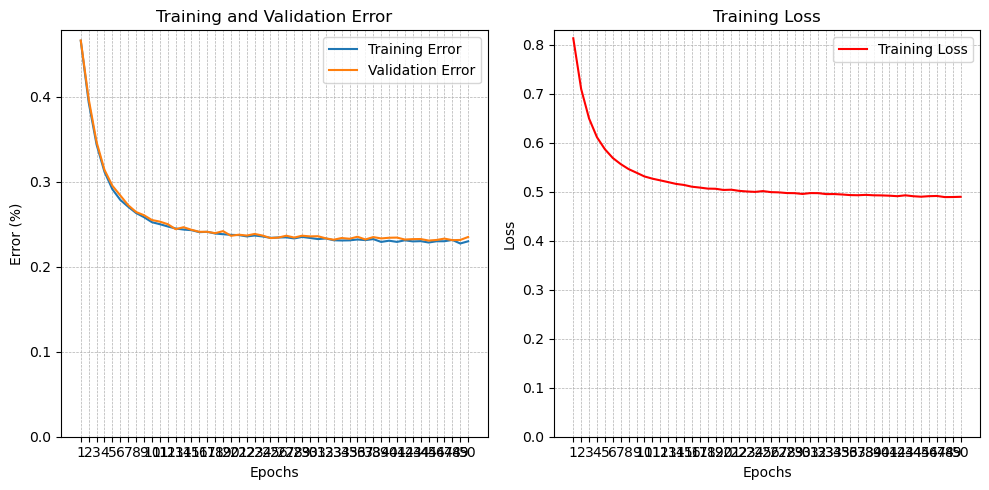



 - binary_finetuning_lr-06_batch128_epochs50

Epoch 1; Train err = 46.92; Val err = 47.62; Loss: 0.7689
Epoch 2; Train err = 45.58; Val err = 46.28; Loss: 0.7562
Epoch 3; Train err = 44.95; Val err = 45.68; Loss: 0.7446
Epoch 4; Train err = 43.99; Val err = 44.63; Loss: 0.7333
Epoch 5; Train err = 43.00; Val err = 44.16; Loss: 0.7237
Epoch 10; Train err = 39.22; Val err = 39.80; Loss: 0.6815
Epoch 15; Train err = 35.83; Val err = 36.81; Loss: 0.6496
Epoch 20; Train err = 33.66; Val err = 34.45; Loss: 0.6275
Epoch 25; Train err = 31.75; Val err = 32.20; Loss: 0.6101
Epoch 30; Train err = 30.90; Val err = 31.80; Loss: 0.5961
Epoch 35; Train err = 29.83; Val err = 30.74; Loss: 0.5866
Epoch 40; Train err = 29.33; Val err = 30.31; Loss: 0.5770
Epoch 45; Train err = 28.56; Val err = 29.40; Loss: 0.5697
Epoch 50; Train err = 27.89; Val err = 28.61; Loss: 0.5639


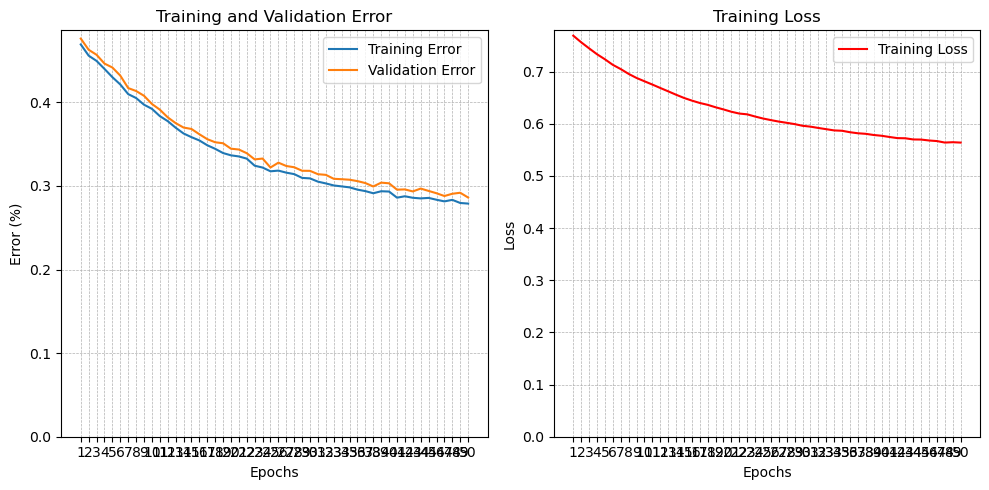

In [5]:
epochs = 50
learning_rates = [0.00001, 0.000001]
batch_sizes = [128]

for lr in learning_rates:
    for batch_size in batch_sizes:
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
        val_dl = DataLoader(validation_ds, batch_size=1000)

        model, opt = binary_finetuning(lr)

        print(f"\n\n - binary_finetuning_lr{str(lr-int(lr))[2:]}_batch{batch_size}_epochs{epochs}\n")

        train_acc, val_acc, train_loss = cnn_functions.train_network(opt, model, device, epochs, train_dl, val_dl)

        cnn_functions.plot_accuracies(train_acc, val_acc, train_loss)

        torch.save(model.state_dict(), f'./weights/binary_finetuning_lr{str(lr)[2:]}_batch{batch_size}_epochs{epochs}.pth')

# Further training the most promising model
binary_extraction_hidden_lr0001_batch128_epochs30 will be trained for 70 more epochs

In [17]:
model, opt = binary_extraction_hidden(0.0000001)
model.load_state_dict(torch.load('./weights/binary_extraction_hidden_lr0001_batch128_epochs30.pth'))

base_epochs = 30
train_accs = [] 
val_accs = []
train_losses = []



 - binary_extraction_hidden_lr0001_batch128_epochs40

Epoch 1; Train err = 15.68; Val err = 18.49; Loss: 0.3835
Epoch 2; Train err = 15.70; Val err = 18.38; Loss: 0.3825
Epoch 3; Train err = 15.66; Val err = 18.17; Loss: 0.3828
Epoch 4; Train err = 15.61; Val err = 18.37; Loss: 0.3840
Epoch 5; Train err = 15.62; Val err = 18.27; Loss: 0.3841
Epoch 10; Train err = 15.65; Val err = 18.35; Loss: 0.3811


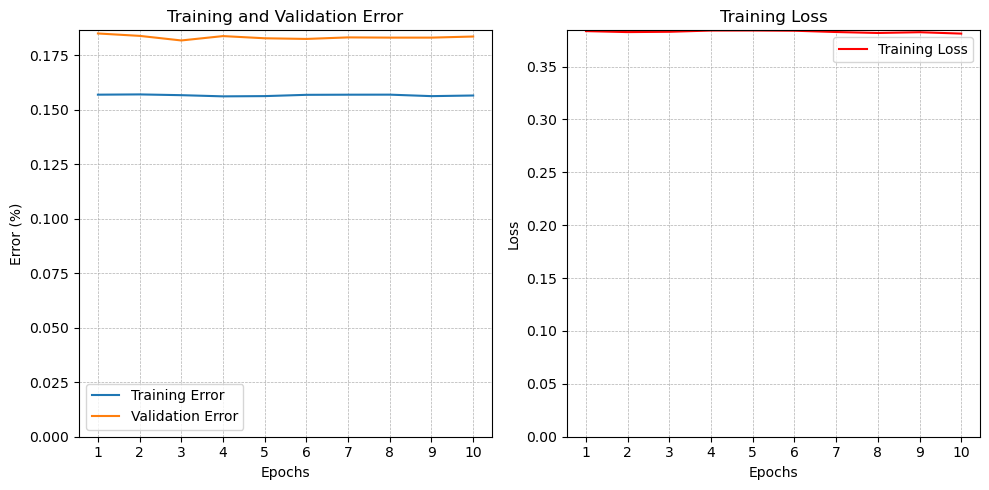



 - binary_extraction_hidden_lr0001_batch128_epochs50

Epoch 1; Train err = 15.67; Val err = 18.26; Loss: 0.3828


KeyboardInterrupt: 

In [18]:
train_dl = DataLoader(train_ds, batch_size=1400, shuffle=True)
val_dl = DataLoader(validation_ds, batch_size=1000)
for i in range(10, 71, 10):
    epochs = base_epochs + i

    print(f"\n\n - binary_extraction_hidden_lr0001_batch128_epochs{epochs}\n")

    train_acc, val_acc, train_loss = cnn_functions.train_network(opt, model, device, 10, train_dl, val_dl)

    train_accs.extend(train_acc)
    val_accs.extend(val_acc)
    train_losses.extend(train_loss)

    cnn_functions.plot_accuracies(train_accs, val_accs, train_losses)

    torch.save(model.state_dict(), f'./weights/binary_extraction_hidden_lr0001_v2_batch128_epochs{epochs}.pth')

# Confusion Matrix

Test accuracy: 81.84%


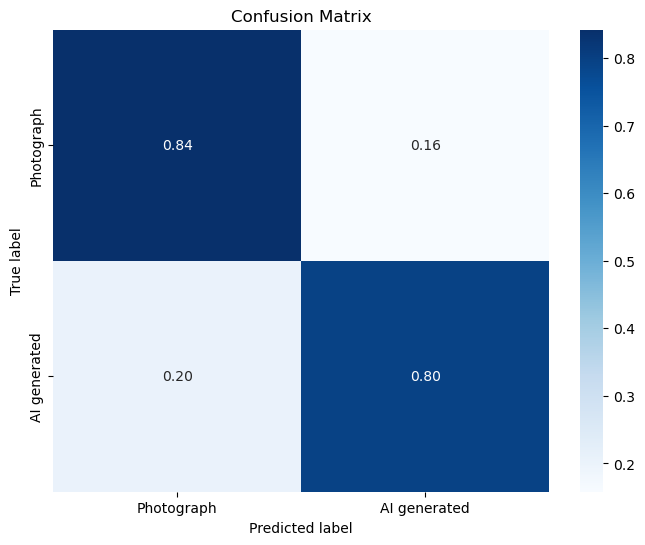

In [23]:
test_loader = DataLoader(validation_ds, batch_size=1000, shuffle=True)

model, _ = binary_extraction_hidden(1)
model.load_state_dict(torch.load('./weights/binary_extraction_hidden_lr0001_batch128_epochs80.pth'))
model.eval() 
device = next(model.parameters()).device

total_correct = 0
total_images = 0
confusion_matrix = torch.zeros(2, 2)  

with torch.no_grad():  
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        
        _, predicted = torch.max(outputs, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()

        for label, prediction in zip(labels.view(-1), predicted.view(-1)):
            confusion_matrix[label.long(), prediction.long()] += 1

accuracy = total_correct / total_images
test_error = 1 - accuracy

print(f'Test accuracy: {accuracy*100:.2f}%')

confusion_matrix_np = confusion_matrix.numpy()

def plot_confusion_matrix(cm, class_names):
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['Photograph', 'AI generated']  
plot_confusion_matrix(confusion_matrix_np, class_names)

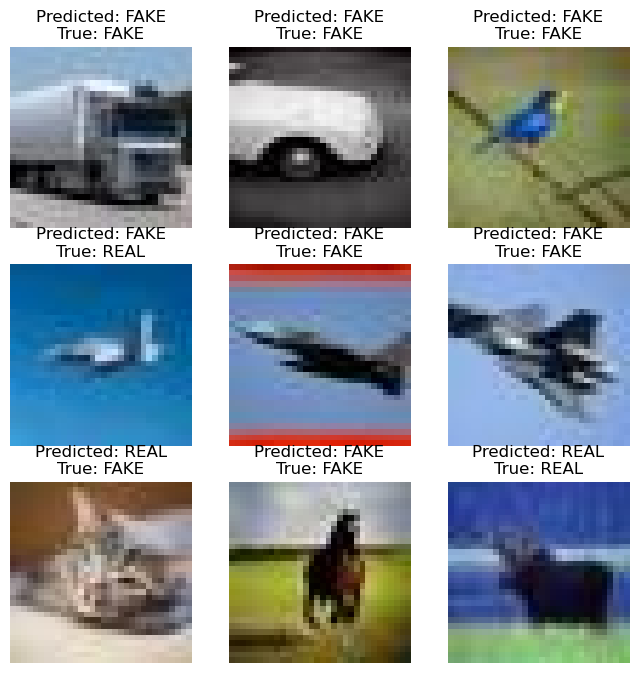

In [22]:
model.eval()  

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_ds), size=(1,)).item()
    img, true_label = train_ds[sample_idx]
    img_tensor = img.unsqueeze(0)  # Add batch dimension

    # Move to the same device as the model
    img_tensor = img_tensor.to(next(model.parameters()).device)

    with torch.no_grad():  # 
        logits = model(img_tensor)
        predicted_label = torch.argmax(logits, dim=1).item()

    img = img.cpu().numpy().transpose((1, 2, 0))  # Adjust for matplotlib (H, W, C)

    figure.add_subplot(rows, cols, i)
    plt.title(f'Predicted: {labels_map[predicted_label]}\nTrue: {labels_map[true_label]}')
    plt.axis("off")
    plt.imshow(img)
plt.show()
